In [ ]:
#Obtain Fred Key
import os
load_dotenv("keys.txt")
fred_key = os.getenv("FRED_API_KEY")
print(f"Fred Key: {type(fred_key)}")
#This is for personal use, You can just enter yours below

[*********************100%***********************]  1 of 1 completed


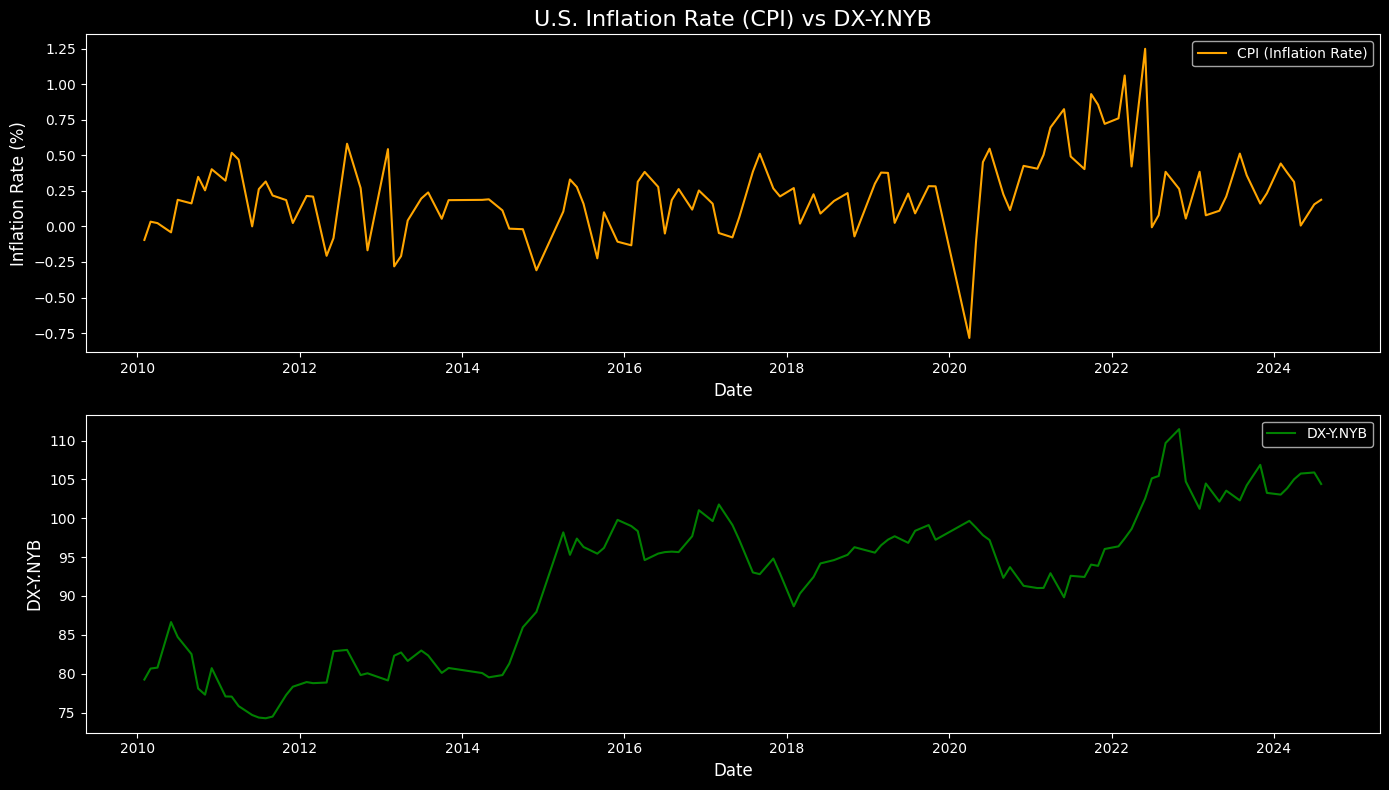

Correlation between U.S. Inflation and DX-Y.NYB: 0.10


In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from fredapi import Fred

# Define the function for CPI analysis
def cpi_vs_index_analysis(start_date, end_date, index_symbol, fred_api_key):
    # Initialize FRED API
    fred = Fred(api_key=fred_api_key)

    # Fetch U.S. inflation data (CPI) from FRED
    try:
        cpi = fred.get_series('CPIAUCSL', start=start_date, end=end_date)  # CPI for All Urban Consumers
    except Exception as e:
        print(f"Error fetching CPI data from FRED: {e}")
        cpi = pd.Series()

    # Fetch the financial index data from yfinance
    try:
        financial_index = yf.download(index_symbol, start=start_date, end=end_date)
    except Exception as e:
        print(f"Error fetching index data from yfinance: {e}")
        financial_index = pd.DataFrame()

    # Combine data into a single DataFrame and calculate inflation rate (percentage change in CPI)
    if not cpi.empty and not financial_index.empty:
        cpi = cpi.pct_change() * 100  # Convert CPI to percentage change (inflation rate)
        combined_df = pd.DataFrame({
            'CPI (Inflation Rate)': cpi,
            'Financial Index': financial_index['Close']
        }).dropna()

        # Plotting with black background
        plt.style.use('dark_background')
        plt.figure(figsize=(14, 8))

        # Plot CPI (Inflation Rate)
        plt.subplot(2, 1, 1)
        plt.plot(combined_df.index, combined_df['CPI (Inflation Rate)'], label='CPI (Inflation Rate)', color='orange')
        plt.title(f'U.S. Inflation Rate (CPI) vs {index_symbol}', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Inflation Rate (%)', fontsize=12)
        plt.legend()

        # Plot Financial Index (e.g., U.S. Dollar Index or S&P 500)
        plt.subplot(2, 1, 2)
        plt.plot(combined_df.index, combined_df['Financial Index'], label=f'{index_symbol}', color='green')
        plt.xlabel('Date', fontsize=12)
        plt.ylabel(f'{index_symbol}', fontsize=12)
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Correlation Analysis
        correlation = combined_df['CPI (Inflation Rate)'].corr(combined_df['Financial Index'])
        print(f"Correlation between U.S. Inflation and {index_symbol}: {correlation:.2f}")
    else:
        print("Data is not available for the specified time range or index.")

# Example usage of the function
start_date = '2010-01-01'
end_date = '2024-10-01'
index_symbol = 'DX-Y.NYB'  # U.S. Dollar Index
fred_api_key = 'Enter Your Key'

# Call the function with the desired parameters
cpi_vs_index_analysis(start_date, end_date, index_symbol, fred_api_key)

[*********************100%***********************]  1 of 1 completed


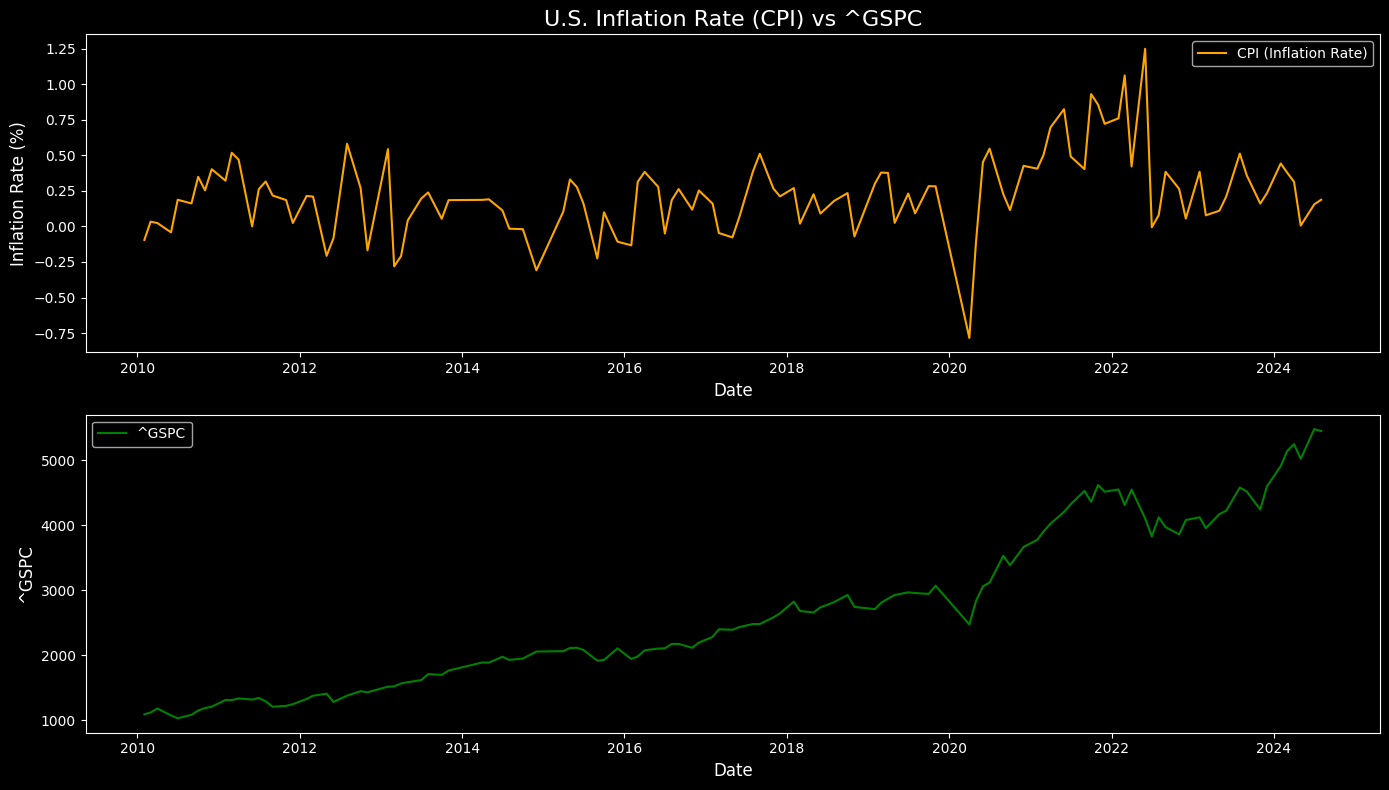

Correlation between U.S. Inflation and ^GSPC: 0.40


In [2]:
index_symbol2 = '^GSPC'  # U.S. Dollar Index
cpi_vs_index_analysis(start_date, end_date, index_symbol2, fred_api_key)